# Parameter Inference in Astronomy

Below we load some handy libraries for our tutorial and configure a bit to make plots prettier.

In [1]:
## Import packages
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Matplotlib settings
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 16
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['figure.figsize'] = (8, 8)

## 2. Hubble parameter: another toy model in 1-D continuous case

Let's consider a more sophisticated case where data are continuous. 
The _Hubble parameter_ $H_0$ is the physical quantity describing the proportionality between our distance to a galaxy $d$ and its speed leaving us $v$:

$$v = H_0 \times d\ \ \ \ \text{(Hubble law).}$$

$H_0$ can be determined via various methods. 
One of them is to measure $v$ and $d$ directly. 
This is what Edwin Hubble did and proposed that the Universe is expanding.

### Hubble flow

Here, we want to mimick what Hubble did. 
Unfortunately, even if we ignore the measurement errors, we cannot determine $H_0$ by simple division of $v$ by $d$. 
The reason is that galaxies can have an additional velocity component, called _peculiar velocity_, due to local kinematics. 
As if a swimmer's total speed is its swimming effort plus the water flow, 
the total velocity of a galaxy $v_\mathrm{tot}$ is the sum of the peculiar velocity $v_\mathrm{p}$ and the "Hubble flow" $v_\mathrm{H}$. 
Only $v_\mathrm{tot}$ can be observed, while in the equation we actually want $v_\mathrm{H}$. 
This means, knowing that $v_\mathrm{tot} = v_\mathrm{p} + v_\mathrm{H}$, we may rewrite the Hubble law as 

$$v_\mathrm{tot} = v_\mathrm{p} + H_0 \times d.$$

### Modelling randomness

It turns out that $v_\mathrm{p}$ can be modelled as a random variable taken from a _Gaussian distribution_. 
A Gaussian distribution (normal distribution) is characterized by the following equation:

$$P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\cdot\sigma}\exp\Bigg(-\frac{1}{2}\bigg(\frac{x-\mu}{\sigma}\bigg)^2\Bigg)$$

where $\mu$ is the mean and $\sigma$ is the standard deviation (std). 
Sometimes we simply write $x\sim \mathcal{N}(\mu,\sigma^2)$ if $x$ is taken from this distribution.

### 2.1 Gaussian distribution

In Python, there are already tools for calculations with Gaussian distribution. 
Let's verify them. 
Type `stats.norm.pdf?` and `np.random.randn?` to learn what these 2 functions stand for. 
Use them to fulfill the task. 
We assume `mu = 1` and `sigma = 2`. 
What does the word "pdf" mean?

**TODO:**
- **Show how a Gaussian distribution looks like**
- **Reconstruct it with histograms of samples**

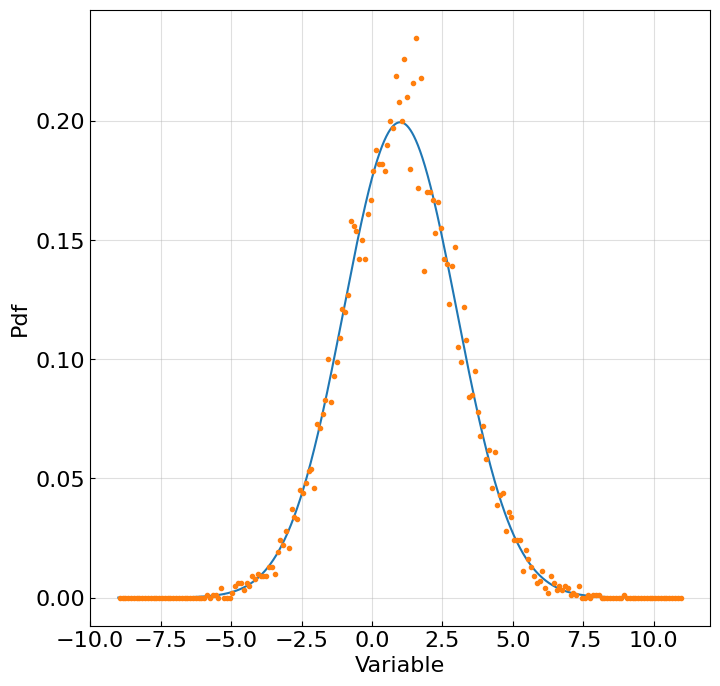

In [2]:
## Define the parameters
mu = 1
sigma = 2

## TODO: Add your code here for theoretical distribution

## Define a x array
x_arr = np.arange(-9, 11.001, 0.01)

## Calculate the pdf
y_arr = stats.norm.pdf(x_arr, loc=mu, scale=sigma)

## Plot
plt.plot(x_arr, y_arr)

## End of TODO

## TODO: Add your code here for reconstructed distribution

## Define N
N = 10000

## Make samples
samples = mu + np.random.randn(N) * sigma

## Define bins
bins = np.arange(-9, 11.001, 0.1)

## Then we can plot plt.hist with density=True to get the proper normalization.
#plt.hist(samples, bins, density=True, histtype='step');

## However, normalization is so important that it's better to do it by hand yourself.
## Not only to understand how it works, but also to remind yourself of this step 
## since it's so easy to forget.

## Use np.histogram to make histogram
n_arr, bins = np.histogram(samples, bins)

## Calculate the center of bins
ctr_bins = 0.5 * (bins[1:] + bins[:-1])

## n_arr is a int array; turn its type into float to make sure that division works without bug
n_arr = n_arr.astype(float)

## Normalization of histogram
n_arr /= n_arr.sum()

## Get binwidth
binwidth = bins[1] - bins[0]

## Divide it by binwidth
n_arr /= binwidth
## Why this? Because we are comparing a histogram (discrete points) to a pdf (continuous function).
## It is as if we calculate Riemann's sum: approximating the integral with rectangles.
## If we want to get the same area, the width of rectangles must be accounted for.
## The integral of a pdf is always 1. So, the sum of rectangles has to be 1.
## And, the sum of rectangles is their total heights times the width.
## So, we need to rescale their total heights to 1/width to match the area.

## Plot ctr_bins as x, n_arr as y
plt.plot(ctr_bins, n_arr, '.');

## End of TODO

## Labels
plt.xlabel('Variable')
plt.ylabel('Pdf');

### Framework for parameter inference

Note that a Gaussian is characterized by a mean and a std. 
In the case of peculiar velocity, the mean is 0 as the Universe is assumed isotropic. 
The std, called _velocity dispersion_ $\sigma_\mathrm{p}$, can be calulated with independent methods.

Now we can apply the formalism at the end of Section 1 to this example. 
By considering $d$ as a constant, we have
- as data: $v_\mathrm{tot}$,  
- as parameter: $H_0$,
- as model: $v_\mathrm{tot}(H_0) = d\cdot H_0 + v_\mathrm{p}$, where $v_\mathrm{p}\sim \mathcal{N}(0, \sigma_\mathrm{p}^2)$.

In addition, we assume that an independent method found that $\sigma_\mathrm{p}$ depends on $H_0$, 
described by $\sigma_\mathrm{p}(H_0) = -50 + 10\cdot H_0\ \mathrm{[km/s]}$. 
We also assume that $d = 13.8\ \mathrm{[Mpc]}$.

### 2.2 Lambda expression

The lambda expression is a very flexible way to define functions in Python. 
For example, $f(x,y)=x\cdot y^2$ can be written as `f = lambda x, y: x * y**2`. 
Then, when you execute `f(2, 3)`, it gives you `18`.

**TODO: Use the lambda expression of Python to define `sigma_p`.**

In [3]:
## TODO: Add your code here for lambda expression

sigma_p = lambda H_0: -50 + 10*H_0

## End of TODO

### 2.3 Implement the model

Can you draw the models for 5 different input $H_0$? 
We will consider the cases of `H_0 = 50`, `60`, `70`, `80`, and `90` [km/s/Mpc]. 
Remind yourself that a model is a pdf. 
So this should be shown as 5 pdf curves, each with a color. 
No reconstruction by sampling is needed.

**TODO: Show distributions of `v_tot` in [-500, 2500] when `H_0 = 50`, `60`, `70`, `80`, and `90`**

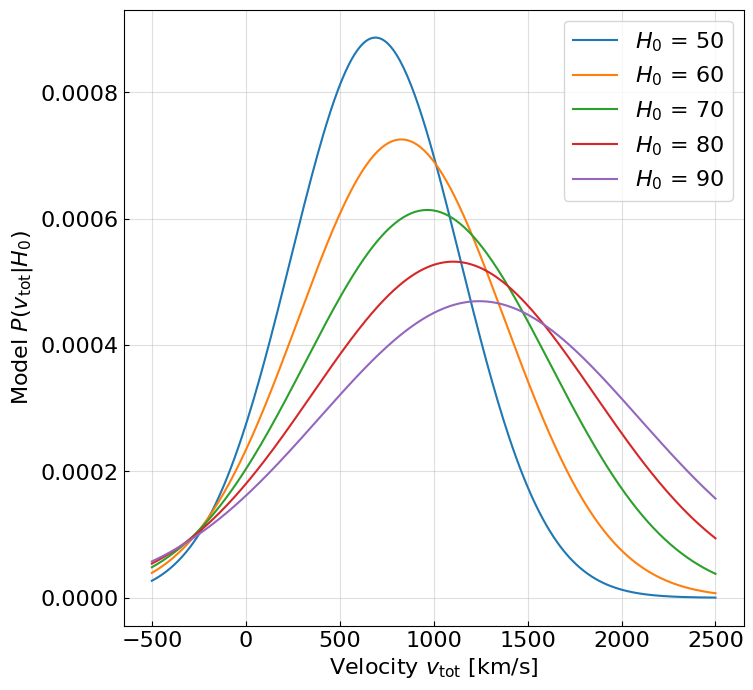

In [4]:
## Define d
d = 13.8

## Define the list of H_0
H_0_list = [50, 60, 70, 80, 90]

## TODO: Add your code here for models

## The model
P_v_tot = lambda v_tot, H_0: stats.norm.pdf(v_tot, loc=d*H_0, scale=sigma_p(H_0))

## Define an arbitrarily chosen range of v to determine probability
v_arr = np.arange(-500, 2500.1, 10)

## Plot probabilities for different H_0
for H_0 in H_0_list:
    plt.plot(v_arr, P_v_tot(v_arr, H_0), label='$H_0$ = %d' % H_0)

## End of TODO

## Labels and legend are important
plt.xlabel(r'Velocity $v_\mathrm{tot}$ [km/s]')
plt.ylabel(r'Model $P(v_\mathrm{tot}|H_0)$')
plt.legend();

### 2.4 Got an observation

At this moment, you find under the desk a piece of paper. 
Luckily, this piece of paper indicates the characteristics of a galaxy in the Virgo Cluster:
- `d = 13.8` [Mpc],
- `v_obs = 1221` [km/s].

Can you calculate the likelihood values for `H_0 = 50`, `60`, `70`, `80`, and `90` for this only galaxy that you have?

**TODO: Calculate likelihoods for `H_0 = 50`, `60`, `70`, `80`, and `90` given `v_obs = 1221`**

In [5]:
## Define v_obs
v_obs = 1221

## TODO: Add your code here for likelihoods

for H_0 in H_0_list:
    ## The likelihood is just the model applied to the observed value: v_obs.
    print('For H_0 = %f, likelihood = %f' % (H_0, P_v_tot(v_obs, H_0)))

## End of TODO

For H_0 = 50.000000, likelihood = 0.000442
For H_0 = 60.000000, likelihood = 0.000562
For H_0 = 70.000000, likelihood = 0.000568
For H_0 = 80.000000, likelihood = 0.000525
For H_0 = 90.000000, likelihood = 0.000469


### 2.5 Let's go continuous

It looks like we have a vague idea of how much `H_0` is now. 
However, `H_0` is continuous. 
We cannot simply pick the largest likelihood among 5 values. 
Can you plot the likelihood function in the interval [20, 300]?

**TODO:**
- **Define the likelihood using the lambda expression**
- **Draw the likelihood for `H_0` in [20, 300]**
- **Is it symmetric? Why?**

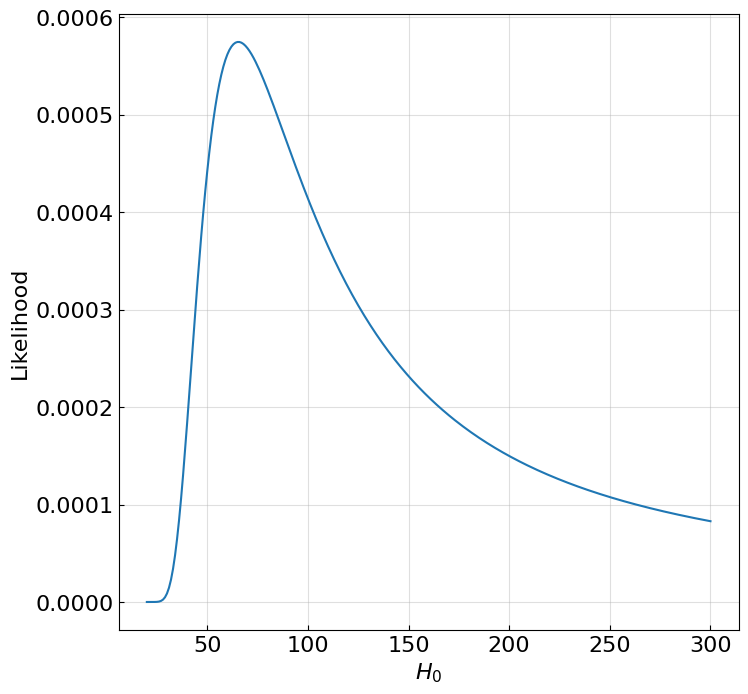

In [6]:
## TODO: Add your code here for the likelihood function

## Likelihood by lambda expression
likelihood = lambda H_0: P_v_tot(v_obs, H_0)

## Array for plotting
H_0_arr = np.arange(20, 300.1, 1)

## Plot
plt.plot(H_0_arr, likelihood(H_0_arr))

## End of TODO

## Labels
plt.xlabel('$H_0$')
plt.ylabel('Likelihood');

Take a look at the plot above. 
You might comment that we know `H_0` quite well now. 
It should be likely between 40 and 120, most possibly at 65, right? 
Well, that's an error bar of 80, while the state of the art is 0.9... 
This is not your fault because in the end, you only have 1 datum!

This highlights how important the error bar is. 
Estimating error bars is the core of astronomy and here we are going to learn it.
The only problem is that there are several different ways...

### 2.6 Try a fancy 3-D plot

We need to have a bigger picture before discussing different approaches of error estimation. 
And the way to do this is to make a 3-D plot of the joint distribution of `v_tot` and `H_0`. 
I won't explain how to do with Python, but show it directly. 

**TODO:**
- **Modify `model` and assign it to the yours**
- **Understand why curves from Questions 2.3 and 2.5 are just slices of this plot**

<IPython.core.display.Javascript object>


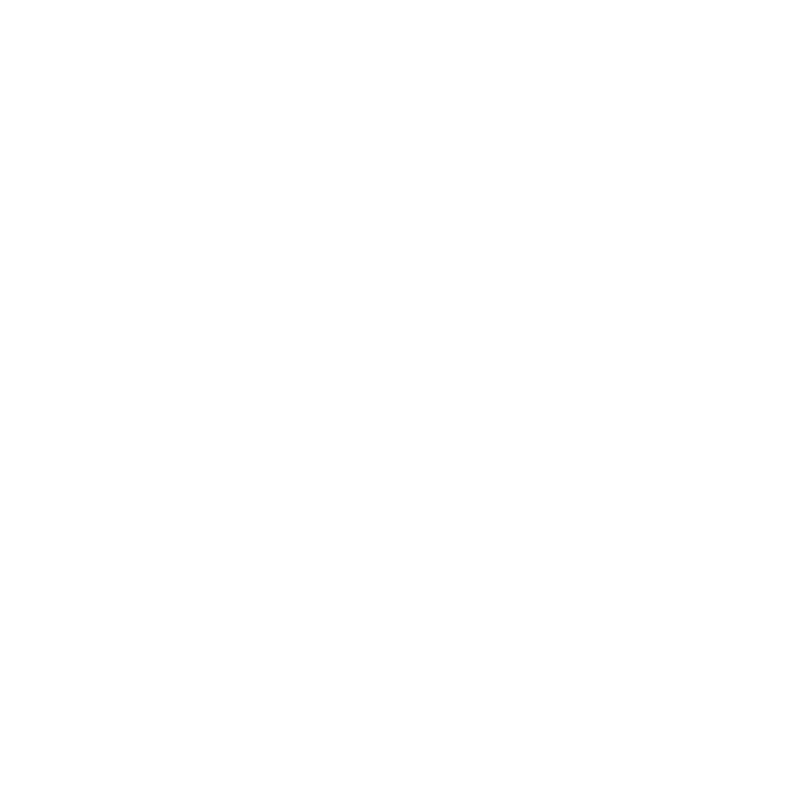

In [7]:
## Magic command to make the plot interactive
%matplotlib notebook

## Import package for 3-D plot
from mpl_toolkits.mplot3d import axes3d

## Define figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## Arrays for plotting
v_arr = np.arange(-500, 2500.1, 10)
H_0_arr = np.arange(20, 300.1, 1)

## Make a grid
x_grid, y_grid = np.meshgrid(v_arr, H_0_arr)

## Determine the probability value on the grid
## Start with an empty list
z_grid = []

## Append row by row for each H_0 
for H_0 in H_0_arr:
    ## TODO: Assign `model` to the model that you have implemented in Question 2.3
    
    model = P_v_tot
    
    ## End of TODO
    
    z_grid.append(model(v_arr, H_0))

## Make an array
z_grid = np.array(z_grid)

## Plot
ax.plot_wireframe(x_grid, y_grid, z_grid, rstride=20, cstride=20)

## Add labels
ax.set_zticklabels([])
ax.set_xlabel(r'$v_\mathrm{tot}$')
ax.set_ylabel('$H_0$')
ax.set_zlabel('Joint probability');

Great! Now this is the starting point of the error estimation:
the joint distribution of data and parameters.

The first approach I am going to talk about is the Bayesian approach. 
The word "Bayesian" comes from the Bayes' theorem, of course.

Let's switch back to the `inline` mode with aesthetic settings first.

In [8]:
%matplotlib inline
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 16
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['figure.figsize'] = (8, 8)

### 2.7 Bayesian: the power of prior

Let's come back to the likelihood that we drew in Question 2.5. 
What we really want to know is the posterior.
However, the posterior is the likelihood times the prior.
The prior is then the key. 
We will study 3 common priors in this exercise: flat, log, and Gaussian.

Be careful, the log prior, which is flat in log space, is tricky to implement.
You may need to do some calculations on paper before coding it.

**TODO: Compare a flat prior, a log prior, and a Gaussian prior of $\mathcal{N}(70, 10)$**

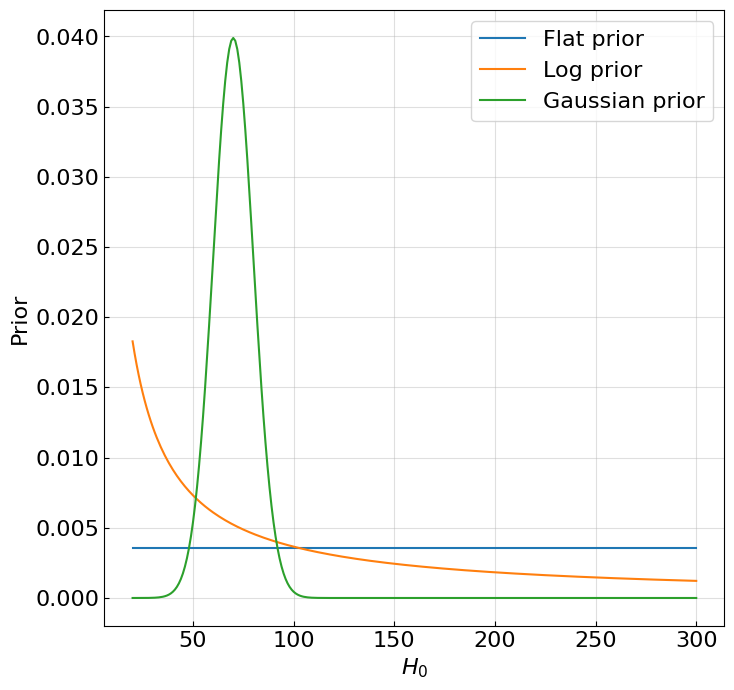

In [9]:
## TODO: Add your codes here for different priors

## Define priors
flat_prior = lambda H_0: np.ones_like(H_0)
log_prior = lambda H_0: 1 / H_0
gaussian_prior = lambda H_0: stats.norm.pdf(H_0, loc=70, scale=10)

## Apply to the focused interval
flat_arr = flat_prior(H_0_arr)
log_arr = log_prior(H_0_arr)
Gaussian_arr = gaussian_prior(H_0_arr)

## Normalization
binwidth_H_0 = H_0_arr[1] - H_0_arr[0]
flat_arr /= flat_arr.sum() * binwidth_H_0
## => flat_arr = flat_arr / (flat_arr.sum() * binwidth_H_0)

log_arr /= log_arr.sum() * binwidth_H_0
Gaussian_arr /= Gaussian_arr.sum() * binwidth_H_0

## Plot
plt.plot(H_0_arr, flat_arr, label='Flat prior')
plt.plot(H_0_arr, log_arr, label='Log prior')
plt.plot(H_0_arr, Gaussian_arr, label='Gaussian prior')

## End of TODO

## Labels and legend
plt.xlabel('$H_0$')
plt.ylabel('Prior')
plt.legend();

### 2.8 Bayesian: posteriors under different priors

OK, now it's time to see the consequence.

**TODO:**
- **Compare the posteriors in the interval of [20, 300] from 3 different priors**
- **Calculate the maximum posterior value of `H_0` in all 3 cases**

From flat prior, the maximum posterior of H_0 = 65.000000
From log prior, the maximum posterior of H_0 = 57.000000
From Gaussian prior, the maximum posterior of H_0 = 70.000000


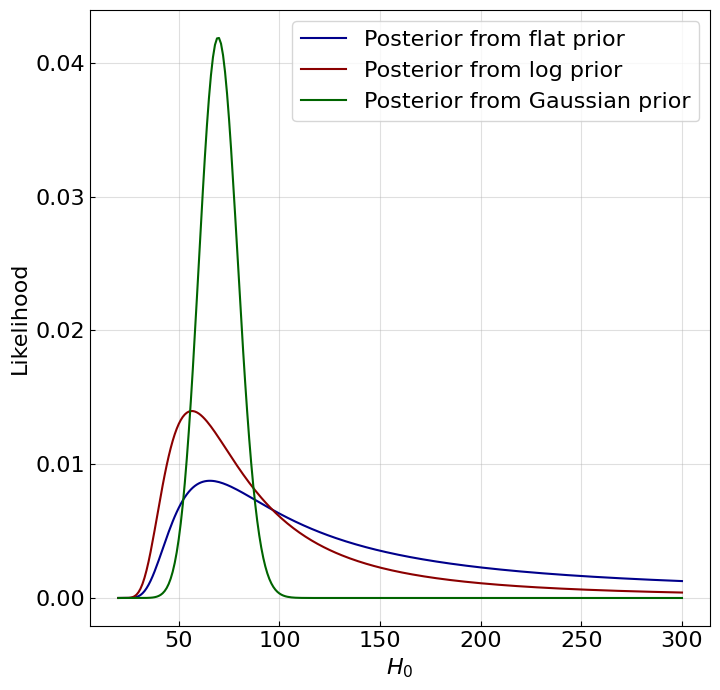

In [10]:
## TODO: Add your codes here for different posteriors

## Likelihood array
like_arr = likelihood(H_0_arr)

## Posterior arrays
post_flat_arr = like_arr * flat_arr
post_log_arr = like_arr * log_arr
post_Gaussian_arr = like_arr * Gaussian_arr

## Normalization
post_flat_arr /= post_flat_arr.sum() * binwidth_H_0
post_log_arr /= post_log_arr.sum() * binwidth_H_0
post_Gaussian_arr /= post_Gaussian_arr.sum() * binwidth_H_0

## Plot
plt.plot(H_0_arr, post_flat_arr, color='darkblue', label='Posterior from flat prior')
plt.plot(H_0_arr, post_log_arr, color='darkred', label='Posterior from log prior')
plt.plot(H_0_arr, post_Gaussian_arr, color='darkgreen', label='Posterior from Gaussian prior')

## End of TODO

## TODO: Add your codes here for maximum posterior

## The maximum can be found with np.argmax.
index = post_flat_arr.argmax()
max_post_flat = H_0_arr[index]
index = post_log_arr.argmax()
max_post_log = H_0_arr[index]
index = post_Gaussian_arr.argmax()
max_post_Gaussian = H_0_arr[index]

## Print
print('From flat prior, the maximum posterior of H_0 = %f' % max_post_flat)
print('From log prior, the maximum posterior of H_0 = %f' % max_post_log)
print('From Gaussian prior, the maximum posterior of H_0 = %f' % max_post_Gaussian)

## End of TODO

## Labels and legend
plt.xlabel('$H_0$')
plt.ylabel('Likelihood')
plt.legend();

Ah, the maximum posterior values of `H_0` are different! 
Which one is the correct one? 
Well, in a Bayesian way of thinking, there is **no** correct one! 
Or every one is the correct one,
as long as there exists a legitimate reason to choose that prior! 

In our example, we can say that we use:
- a Gaussian prior of $\mathcal{N}(70, 10)$ because this comes from an independent analysis and we want to combine the ours with it; or
- a log prior because we think that there is no prior knowledge on what order of magnitude `H_0` should be and it's crucial to know it; or
- a flat prior because we think the order of magnitude `H_0` does not vary much and we have no other prior knowledge about the value.  

It's all about the interpretation.

### 2.9 Bayesian: building credible interval

Now we can draw our "error bar". 
The formal name for the 1-D Bayesianly-interpretated error is _credible interval_.
It determines the **most probable** range of values for the considered parameter. 
By definition, the probability value of any point in this interval must be higher than any other point outside interval.

Let's write a function to do this in Python.
We consider the following function prototype:
```
def find_threshold(posterior, fraction)
    ...
    return threshold
```
where `posterior` is an array of posterior values and `fraction` is the fraction of total integral to be reached by the integral on the most probable interval.

We are going to do the following step-by-step:
- normalize `posterior`,
- reorder values increasingly,
- calculate the cumulative sum for the reordered array,
- find the index such that the cumulative sum before that index meets `1 - fraction`,
- get the value on that index, called `threshold`, and 
- return `threshold` after denormalizing it.

The reason to use "increasing order" and `1 - fraction` is numerical, that we won't discuss here.
The returned `threshold` should satisfy `posterior[posterior>=threshold].sum() = fraction * posterior.sum()` within some numerical precision.

**TODO: Implement `find_threshold`**

In [11]:
def find_threshold(posterior, fraction):
    ## Make sure that target has a good value
    assert fraction >= 0 and fraction <= 1, '`target` has to be in [0, 1]'
    
    ## TODO: Add your codes here for threshold finding
    
    ## Remember the sum
    post_sum = posterior.sum()
    
    ## Make a copy and normalize it
    post = posterior.copy() / post_sum
    
    ## Reorder values increasingly
    post = np.sort(post, kind='mergesort')
    
    ## Cumulative sum
    post_cumsum = post.cumsum()
    
    ## Get a boolean array of "larger than 1-target or not"
    boolean = post_cumsum >= 1 - fraction
    ## In this way, `boolean` looks like [0, ..., 0, 1, ..., 1]
    
    ## Get the index of first "1" by using `argmax`
    ## `argmax` only returns the first one if there are multiple indices reaching the maximum
    index = boolean.argmax()
    
    ## Get the threshold value
    threshold = post[index]
    
    ## Denormalize it before returning
    threshold *= post_sum
    return threshold
    
    ## End of TODO

### 2.10 Bayesian: continue to build credible interval

We are going to implement a new function following the prototype below:
```
def find_edges(param_arr, posterior, threshold):
    ...
    return lower, upper
```
where `param_arr` is the array of `H_0` yielding `posterior`, `posterior` is the same array as above, and `threshold` is returned from `find_threshold`. The returned value will be the lower and upper bounds of the `H_0` values larger than `threshold`.

**TODO: Implement find_edges**

In [12]:
def find_edges(param_arr, posterior, threshold):
    ## TODO: Add your codes here for threshold finding
    
    ## Get a boolean array of "larger than threshold or not"
    boolean = posterior >= threshold
    ## In this way, `boolean` looks like [0, ..., 0, 1, ..., 1, 0, ..., 0]
    
    ## Get the index of first "1" by using `argmax`
    ## `argmax` only returns the first one if there are multiple indices reaching the maximum
    index = boolean.argmax()
    
    ## Get the values on the index
    lower = param_arr[index]
    
    ## Flip `boolean` and do it again to find the last "1"
    index = boolean[::-1].argmax()
    
    ## This is the index from the end.
    ## We want the index from the front, however
    index = boolean.size - 1 - index
    
    ## Get the values on the index
    upper = param_arr[index]
    
    return lower, upper
    
    ## End of TODO

### 2.11 Bayesian: drawing credible interval

We usually call a credible interval with the name of "N$\sigma$". A _N$\sigma$ credible interval_ supports the same integral fraction of the posterior as [-N$\sigma$, N$\sigma$] does of the Gaussian distribution $\mathcal{N}(0, \sigma^2)$. For the most commonly used 1$\sigma$ and 2$\sigma$, the corresponding fractions are respectively 0.6827 and 0.9545.

With `find_threshold` and `find_edges`, please show 1$\sigma$ credible intervals for the posteriors obtained from 3 different priors. We can use `plt.errorbar(x, y, xerr=xerr, fmt=fmt)` to show it, where `xerr` should be under the format of `[[x-lower], [upper-x]]`.

**TODO:**
- **Replot 3 posteriors**
- **Plot the maximum posterior and 1$\sigma$ credible interval for each of them**

From flat prior: H_0 = 65.000000 -23.000000/+88.000000
From log prior: H_0 = 57.000000 -18.000000/+50.000000
From Gaussian prior: H_0 = 70.000000 -10.000000/+9.000000


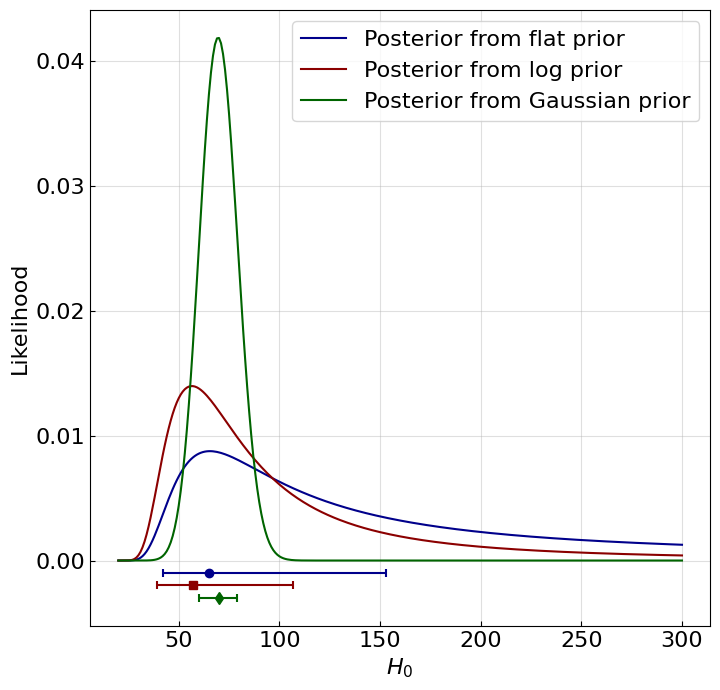

In [13]:
## TODO: Add your codes here for posteriors

plt.plot(H_0_arr, post_flat_arr, color='darkblue', label='Posterior from flat prior')
plt.plot(H_0_arr, post_log_arr, color='darkred', label='Posterior from log prior')
plt.plot(H_0_arr, post_Gaussian_arr, color='darkgreen', label='Posterior from Gaussian prior')

## End of TODO

## Define fraction
## This is roughly 0.6827.
fraction = stats.norm.cdf(1) - stats.norm.cdf(-1)

## TODO: Add your codes here for maxima posteriors and credible intervals

## Define which y to plot these
y_flat = -0.1e-2
y_log = -0.2e-2
y_Gaussian = -0.3e-2

## Get threshold
th_flat = find_threshold(post_flat_arr, fraction)
th_log = find_threshold(post_log_arr, fraction)
th_Gaussian = find_threshold(post_Gaussian_arr, fraction)

## Get edges
lower_flat, upper_flat = find_edges(H_0_arr, post_flat_arr, th_flat)
lower_log, upper_log = find_edges(H_0_arr, post_log_arr, th_log)
lower_Gaussian, upper_Gaussian = find_edges(H_0_arr, post_Gaussian_arr, th_Gaussian)

## Put error bars in the wanted format
x_err_flat = [[max_post_flat-lower_flat], [upper_flat-max_post_flat]]
x_err_log = [[max_post_log-lower_log], [upper_log-max_post_log]]
x_err_Gaussian = [[max_post_Gaussian-lower_Gaussian], [upper_Gaussian-max_post_Gaussian]]

## Plot maxima posteriors
plt.errorbar(max_post_flat, y_flat, xerr=x_err_flat, fmt='o', color='darkblue', capsize=3, capthick=1.5)
plt.errorbar(max_post_log, y_log, xerr=x_err_log, fmt='s', color='darkred', capsize=3, capthick=1.5)
plt.errorbar(max_post_Gaussian, y_Gaussian, xerr=x_err_Gaussian, fmt='d', color='darkgreen', 
             capsize=3, capthick=1.5);

## Print
print('From flat prior: H_0 = %f -%f/+%f' % (max_post_flat, x_err_flat[0][0], x_err_flat[1][0]))
print('From log prior: H_0 = %f -%f/+%f' % (max_post_log, x_err_log[0][0], x_err_log[1][0]))
print('From Gaussian prior: H_0 = %f -%f/+%f' % (max_post_Gaussian, x_err_Gaussian[0][0], x_err_Gaussian[1][0]))

## End of TODO

## Labels and legend
plt.xlabel('$H_0$')
plt.ylabel('Likelihood')
plt.legend();

You did it! 
This is what we call _parameter inference_:
using an observation to infer the parameter of a model, with a level of (un)certainty quantified.
The exercise above is an example of Bayesian inference.
Let's now turn to an alternative: the frequestist approach.

### Frequentist: it's about the model

Remind yourself of the 3-D plot in Question 2.6.
While a Bayesian approach focuses on the likelihood, a data-fixed slice (`v_tot` fixed),
a frequentist approach focuses on the model, a parameter-fixed slice (`H_0` fixed).

The model is stochastic (probabilistic). 
This means that if we generate a great number of realizations, 
the results are likely to be different and follow the model distribution. 
Some results are common but some are rather rare;
and a frequentist way of thinking is about 
**how frequent an observation rarer than the current one could happen, if this is the correct parameter**. 
If this is really unlikely, we consider this parameter as excluded (wrong, basically).

There is no prior here. 
Think about what we learn from Section 1. 
The prior is a function in the **parameter space**.
A model, however, is a function in the **data space**.
So a frequentist approach is free from prior-choosing in the analysis.

### 2.12 Frequentist: how rare? how frequent?

We will calculate how frequent an observation rarer than the current one could happen. 
We will call this value `p`. 
Please complete the following prototype first:
```
def get_p(H_0):
    ...
    return p
```
then apply it to `H_0 = 50`, `60`, `70`, `80`, and `90`.
Keep in mind that that the observed value of `v_tot` is `v_obs = 1221` 
and that we have implemented the model in Question 2.3.

**TODO: Implement `get_p`**

In [14]:
def get_p(H_0):
    ## TODO: Add your codes here for get_p
    
    ## Get a sufficiently big v_arr
    v_arr = np.arange(-500, 10000.1, 10)
    
    ## Full model array
    P_v_arr = P_v_tot(v_arr, H_0)
    
    ## Probablity of the observation
    P_obs = P_v_tot(v_obs, H_0)
    
    ## Get those which are rarer
    boolean = P_v_arr < P_obs
    
    ## Calculate the ratio
    p = P_v_arr[boolean].sum() / P_v_arr.sum()
    return p

    ## End of TODO
    
## Print out
for H_0 in H_0_list:
    print('For H_0 = %f, p = %f' % (H_0, get_p(H_0)))

For H_0 = 50.000000, p = 0.231432
For H_0 = 60.000000, p = 0.468559
For H_0 = 70.000000, p = 0.691185
For H_0 = 80.000000, p = 0.870818
For H_0 = 90.000000, p = 0.980846


### 2.13 Frequentist: $p$-value

The `p` above is the famous $p$-value that people often talk about. The _$p$-value_ is the degree of commonness. The smaller the $p$-value, the rarer the event.

Can you draw the curve of $p$-value for our range of `H_0`, [20, 300]? To avoid numerical effects, we might need to consider a big range of `v_tot`.

**TODO: Plot $p$-value as a function of `H_0` in [20, 300]**

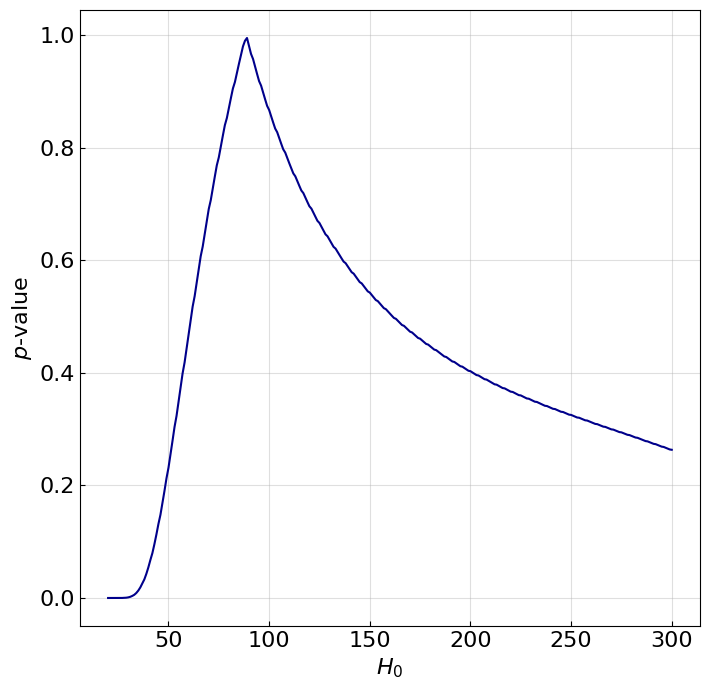

In [15]:
## TODO: Add your codes here for p-value

## Define an empty list
p_arr = []

## Calculate and append p-value one by one
for H_0 in H_0_arr:
    p_arr.append(get_p(H_0))
    
## Turn array
p_arr = np.array(p_arr)

## Plot
plt.plot(H_0_arr, p_arr, color='darkblue')

## End of TODO

## Labels
plt.xlabel('$H_0$')
plt.ylabel('$p$-value');

### 2.14 Frequentist: confidence interval

The error bar in a frequentist approach is called _confidence interval_. 
It determines the range of parameter values for which the current observation is not rare.

The confidence intervals are also associated with "N$\sigma$". All parameters in a _N$\sigma$ confidence interval_ should have a $p$-value larger than the integral fraction of $\mathcal{N}(0, \sigma^2)$ **outside** [-N$\sigma$, N$\sigma$]. For 1$\sigma$ and 2$\sigma$, the corresponding fractions are respectively 1-0.6827 and 1-0.9545. 

Let's plot the maximum $p$-value and the 1$\sigma$ confidence interval.

**TODO:**
- **Replot the $p$-value curve**
- **Calculate and plot the maximum $p$-value and the 1$\sigma$ confidence interval**

From p-value: H_0 = 89.000000 -35.000000/+166.000000


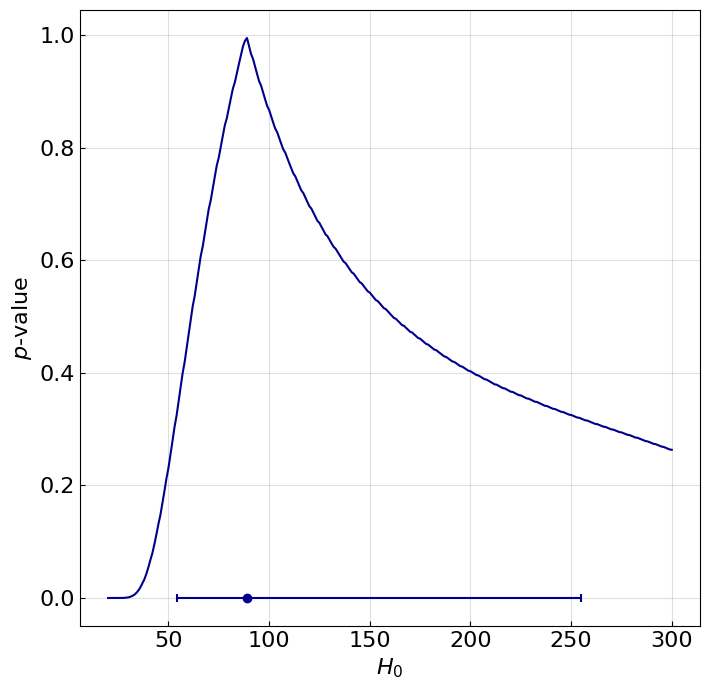

In [16]:
## TODO: Add your codes here for p-value curve

## Replot
plt.plot(H_0_arr, p_arr, color='darkblue')

## End of TODO

## Define fraction
## This is roughly 0.3173.
fraction = 1 - (stats.norm.cdf(1) - stats.norm.cdf(-1))

## TODO: Add your codes here for maximum p-value and confidence interval

## Get maximum
index = p_arr.argmax()
max_pvalue = H_0_arr[index]

## Get edges
lower_pvalue, upper_pvalue = find_edges(H_0_arr, p_arr, fraction)

## Put error bars in the wanted format
x_err_pvalue = [[max_pvalue-lower_pvalue], [upper_pvalue-max_pvalue]]

## Plot maxima posteriors
plt.errorbar(max_pvalue, 0, xerr=x_err_pvalue, fmt='o', color='darkblue', capsize=3, capthick=1.5)

## Print
print('From p-value: H_0 = %f -%f/+%f' % (max_pvalue, x_err_pvalue[0][0], x_err_pvalue[1][0]))

## End of TODO

## Labels
plt.xlabel('$H_0$')
plt.ylabel('$p$-value');

You did it again!
Now you are a master of **both** Bayesian and frequentist inference!

You might ask which one is better? 
Well... there is no definitive answer. 
It depends on what information you possess and what question you would like to answer. 
Both reasonings have substantial drawbacks. 
Mixing is also possible.

Just another comment. 
Remember that we often hear/read something like "95% confidence level for an uncertainty of 2.9%" in a survey?
You have just learnt how we should interpret this!
No? Alright, I will help you.
It means that the $p$-value is lower than 0.05 (1 - 95%) 
**if the truth happens to be outside the interval of the best estimate $\pm$2.9%**. 
It is **not** as if the truth has 5% of chance to be outside that interval. 
You are mixing $p$-value with Bayesian interpretation if you do so. 

Alright, until now we have always been working in 1-dimensional case: 1-D data and 1-D parameter. In real life, both quantities tend to be multi-dimensional and things become more complicated. The next section of the tutorial will teach you how to deal with this scenario.